In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets/auto-mpg.parquet'

df_auto = pd.read_parquet(file)

print(df_auto.info())
df_auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(1) Exploratory Analysis

- Distribution & Boxplot & Relationships

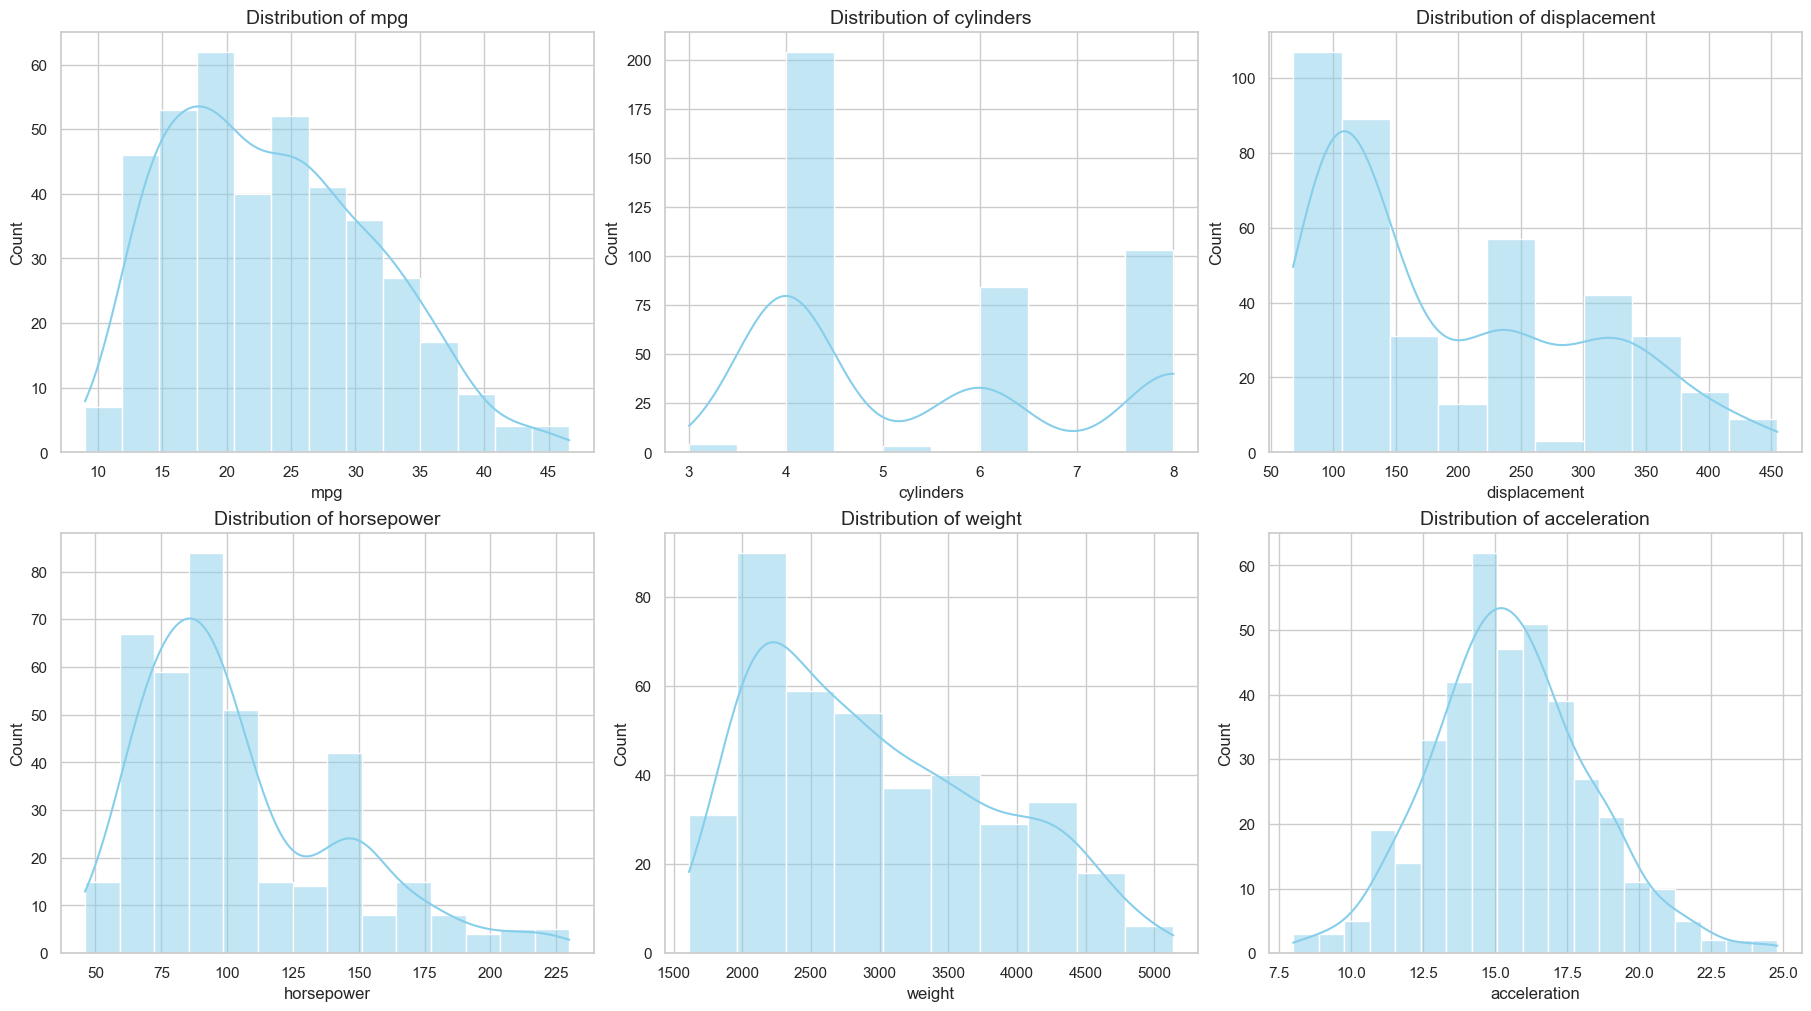

In [3]:
variables = df_auto.columns[0:6]
sns.set(style="whitegrid")

n_vars = len(variables)
# Define grid size (e.g., square-ish layout)
n_cols = 3  # You can change this to control width
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)

# Flatten the axes array for easy indexing, if needed
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=df_auto, x=var, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

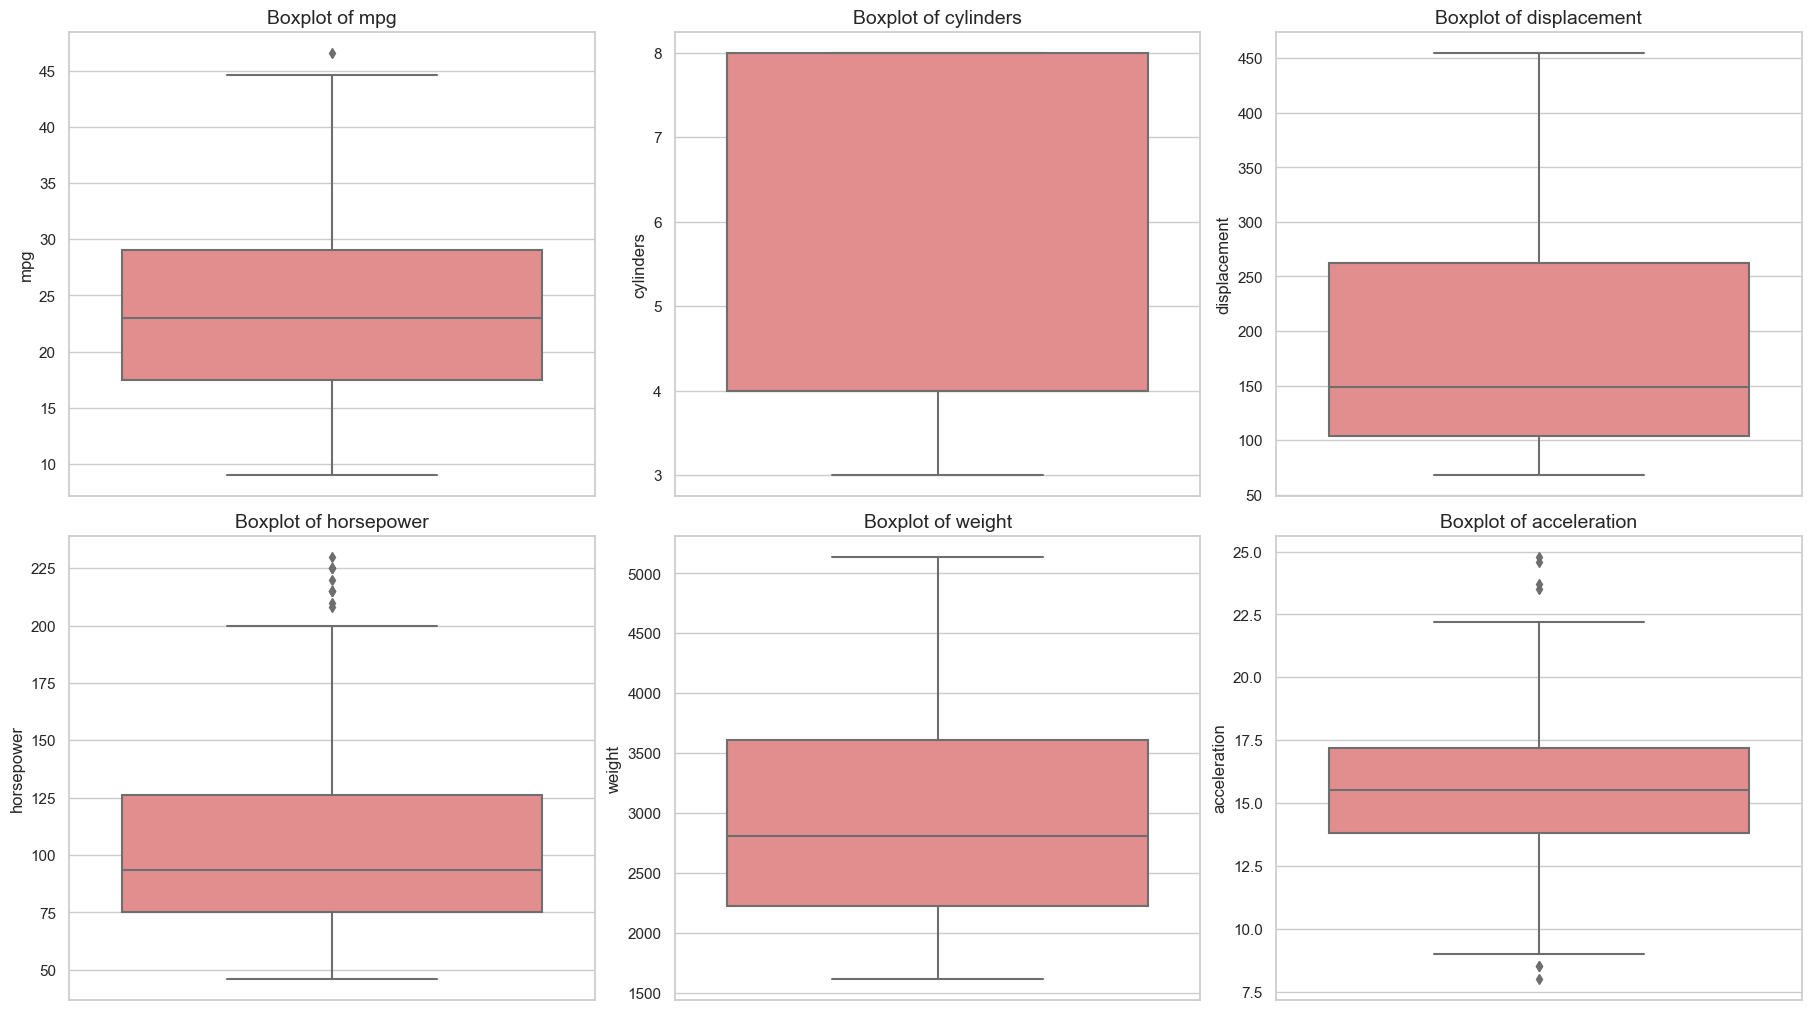

In [4]:
variables = df_auto.columns[0:6]
sns.set(style="whitegrid")

n_vars = len(variables)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_auto, y=var, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var, fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- Relationship between mpg and all other variables

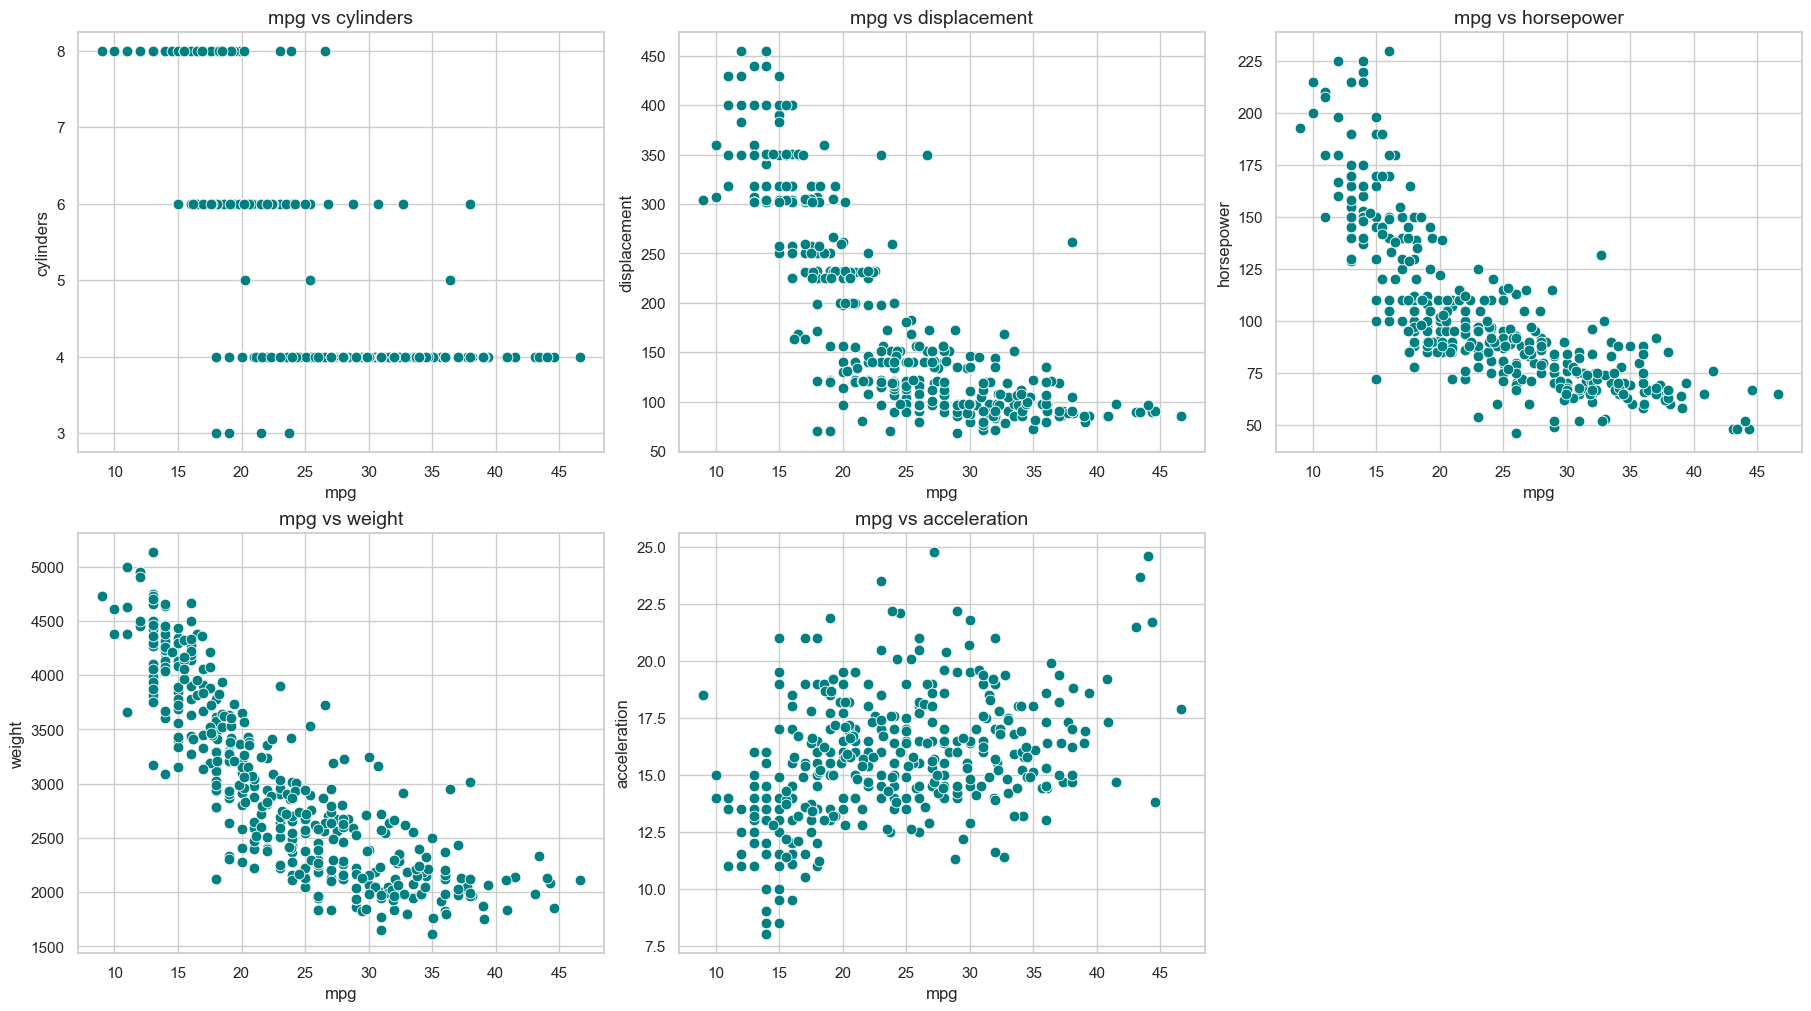

In [5]:
independent_vars = df_auto.columns[1:6]
target = 'mpg'

sns.set(style="whitegrid")

n_vars = len(independent_vars)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, var in enumerate(independent_vars):
    sns.scatterplot(data=df_auto, x=target, y=var, ax=axes[i], color='teal', edgecolor='white', s=60)
    axes[i].set_title(f'{target} vs {var}', fontsize=14)
    axes[i].set_xlabel(target, fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- Correlation Heatmap

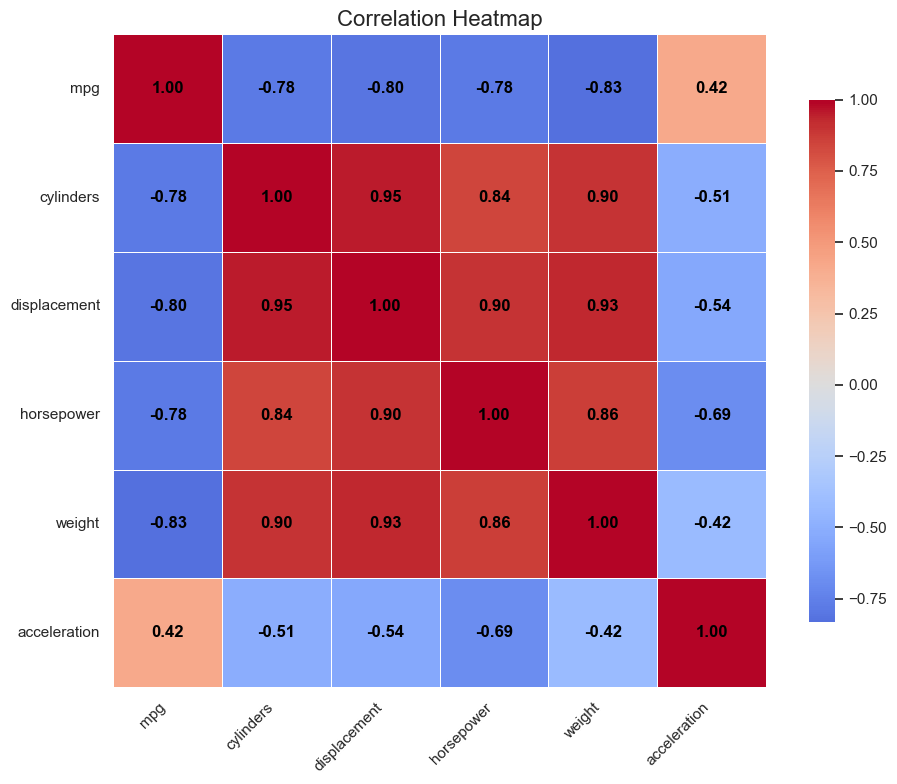

In [6]:
vars_corr = df_auto.columns[0:6]
corr = df_auto[vars_corr].corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(np.arange(len(corr.columns)) + 0.5, corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)) + 0.5, corr.index, rotation=0)
plt.tight_layout()
plt.show()

(2) Exploratory Analysis w/o Outliers (IQR technique)

In [7]:
variables = df_auto.columns[0:6]

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_auto_clean = remove_outliers_iqr(df_auto, variables)

(99) Export

In [8]:
path = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets'

df_auto_clean.to_parquet(f'{path}/df-auto-mpg-no-outliers.parquet')